In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [2]:
# Load and preprocess data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'

stk_data = yf.download(symbol, start=start, end=end)
stk_data = stk_data[["Close"]]

[*********************100%%**********************]  1 of 1 completed


In [3]:
stk_data

,Close
Date,
2021-07-01,746.450012
2021-07-02,750.650024
2021-07-05,760.349976
2021-07-06,758.349976
2021-07-07,762.900024
...,...
2022-01-19,729.599976
2022-01-20,728.900024
2022-01-21,712.500000


In [4]:
column="Close"

In [5]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[[column]])
print("Len:",data1.shape)

Len: (143, 1)


In [6]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

136
X_train length: (136, 1)
X_test length: (7, 1)
y_train length: (136, 1)
y_test length: (7, 1)


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
from sklearn.metrics import mean_squared_error
trends=['n','t','c','ct']
orders=[(0,0,1),(0,0,2)]
from statsmodels.tsa.arima.model import ARIMA
for td in trends:
        
        #print(td)
        #trendslist.append(td)
    model = ARIMA(X_train, order=(0,0,10),trend=td,)
    model_fit = model.fit()
        # make prediction
    y_pred= model_fit.predict(len(X_train), len(data1)-1)
        #print(y_pred)
    from sklearn.metrics import r2_score
    mse=mean_squared_error(y_test,y_pred,squared=False)
    from stockFunctions import rmsemape
    print("Trend={}".format(td))
    rmsemape(y_test,y_pred)
    print("************")

Trend=n
RMSE-Testset: 0.36294203781336626
maPe-Testset: 0.8990645622471461
************
Trend=t
RMSE-Testset: 0.09080137380061305
maPe-Testset: 0.20976450028853497
************
Trend=c
RMSE-Testset: 0.07476479180120718
maPe-Testset: 0.1683764671572178
************
Trend=ct
RMSE-Testset: 0.13547616670599424
maPe-Testset: 0.26038267667934367
************


In [9]:
len(y_pred)

7

In [10]:
#i=1
td="c"
model = ARIMA(X_train, order=(0,0,30),trend=td)
model_fit = model.fit()
# make prediction
y_pred= model_fit.predict(len(X_train), len(data1)-1)
#print(y_pred)
from sklearn.metrics import r2_score
mse=mean_squared_error(y_test,y_pred,squared=False)
from stockFunctions import rmsemape
print("Trend={}".format(td))
rmsemape(y_test,y_pred)
print("************")

Trend=c
RMSE-Testset: 0.1278578656570918
maPe-Testset: 0.24013689819678113
************


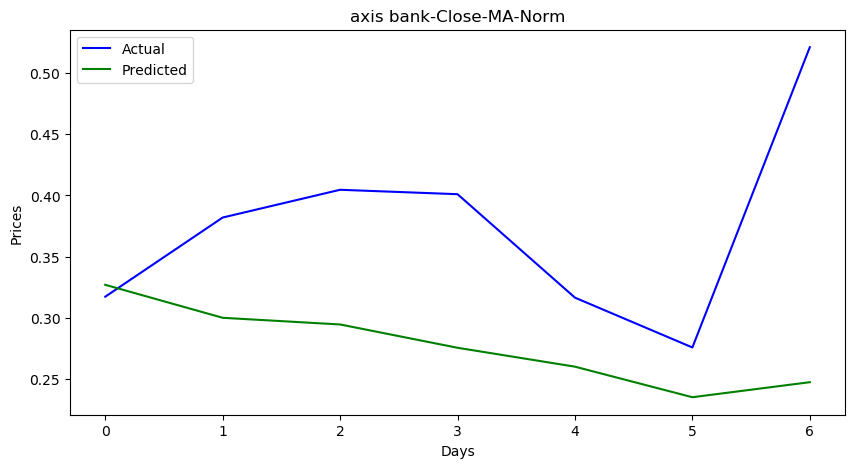

In [22]:
from stockFunctions import graph
graph(y_test,y_pred,"Actual","Predicted","axis bank-Close-MA-Norm","Days","Prices")

In [12]:
len(data1)

143

In [13]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(y_test,[column])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,[column])

In [14]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,[column])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,[column])

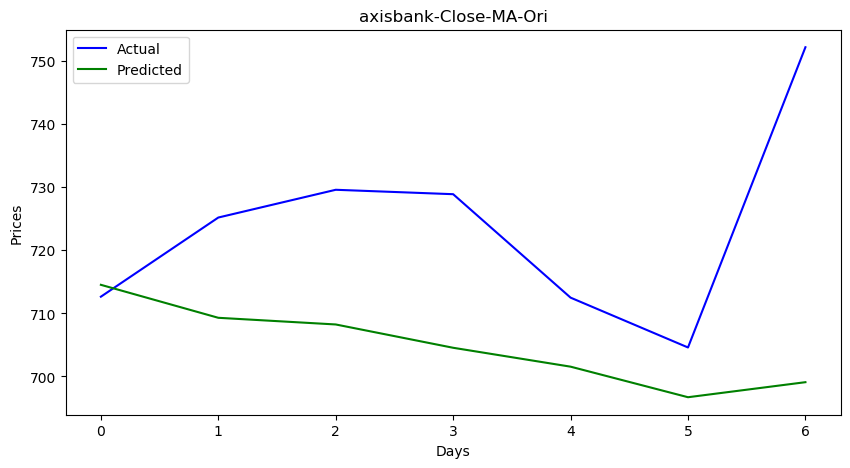

In [23]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","axisbank-Close-MA-Ori","Days","Prices")

In [16]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 24.804425937475827
maPe-Testset: 0.026339857028982536


In [17]:
forecast=model_fit.predict(len(data1), len(data1))

In [18]:
forecast

array([0.26897493])

In [19]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [20]:
forecast_stock_price_test_oriF

,Closefore
0,703.281113


In [21]:
forecast_stock_price_test_oriF.to_csv("CloseMA.csv",index=False)